## Python set-up

In [1]:
# Lib imports
import matplotlib.pyplot as plt
import pandas as pd

# Local imports
from abs_data_capture import (
    AbsLandingPage,
    get_abs_data,
    create_selector_series_dataframe,
    create_all_series_dataframe,
    clear_cache,
    metacol
)

# Clearing cache data from 
clear_cache()

## Get data from ABS

In [2]:
LANDING_PAGE_LABOUR_FORCE = AbsLandingPage(
    theme="labour",
    parent_topic="employment-and-unemployment",
    topic="labour-force-australia",
)

LANDING_PAGE_JOB_VACANCIES = AbsLandingPage(
    theme="labour",
    parent_topic="employment-and-unemployment",
    topic="job-vacancies-australia",
)

In [3]:
def grab_data(
    landing_page: AbsLandingPage,
    zip_table: int = 0,
    verbose: bool = False,
    inspect:str = "",
) -> tuple[dict, str, dict, pd.Timestamp, list[None | pd.Timestamp], tuple[str, str]]:
    """Get ABS data"""
    
    abs_dict_ = get_abs_data(
        landing_page=landing_page, 
        zip_table=zip_table, 
        verbose=verbose,
        inspect=inspect,
    )

    return abs_dict_

abs_dict_lf = grab_data(LANDING_PAGE_LABOUR_FORCE)
abs_dict_jv = grab_data(LANDING_PAGE_JOB_VACANCIES)

## Getting Dataframe with ABS Info

In [22]:
labour_trend = {
        "1": metacol.table,
        "Persons": metacol.did,
        "Trend":metacol.stype
    }

labour_sa = {
        "1": metacol.table,
        "Persons": metacol.did,
        "Seasonally Adjusted":metacol.stype
    }

underemployment_sa = {
        "22": metacol.table,
        "A85256588T": metacol.id,
    }

In [21]:
df_labour_trend = create_selector_series_dataframe(abs_dict_lf, labour_trend)
df_labour_sa = create_selector_series_dataframe(abs_dict_lf, labour_sa)
df_job_vacancy = create_all_series_dataframe(abs_dict_jv)
df_under_sa = create_selector_series_dataframe(abs_dict_lf,underemployment_sa)
df_labour_trend.index = df_labour_trend.index.to_timestamp()
df_labour_sa.index = df_labour_sa.index.to_timestamp()
df_job_vacancy.index = df_job_vacancy.index.to_timestamp()


Nothing selected?


## Getting Plots for PDF

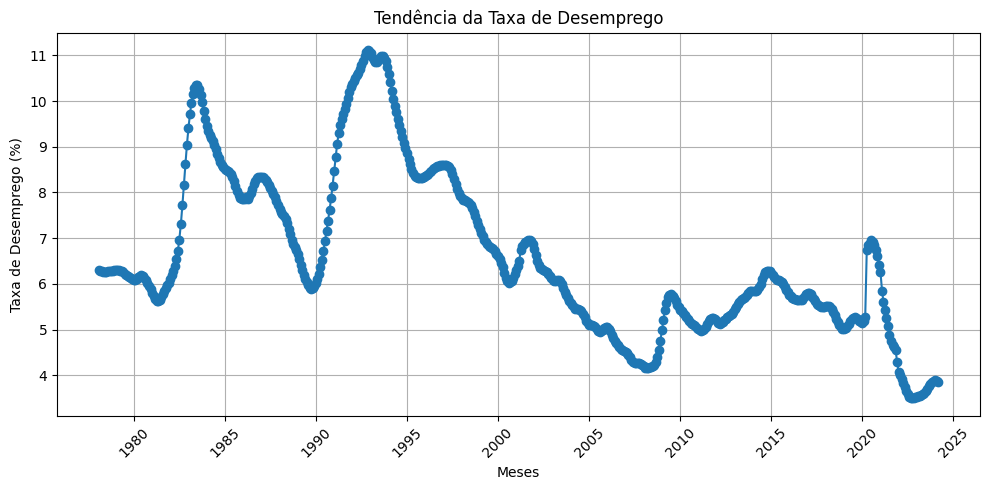

In [7]:
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(df_labour_trend.index, df_labour_trend['Unemployment rate'], marker='o')  # Plota a taxa de desemprego
plt.title('Tendência da Taxa de Desemprego')  # Título do gráfico
plt.xlabel('Meses')  # Rótulo do eixo X
plt.ylabel('Taxa de Desemprego (%)')  # Rótulo do eixo Y
plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
plt.xticks(rotation=45)  # Rotaciona os labels do eixo X para melhor visualização
plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.show() 